# Tenglo Channel, Puerto Montt, Chile
# 12 Dec 2023
- separates the vertical profiles from the IO-IO cast  
-- digitize (ginpu) the separation indexes   
-- generates lists of profiles and header (time/depth) for each profile  
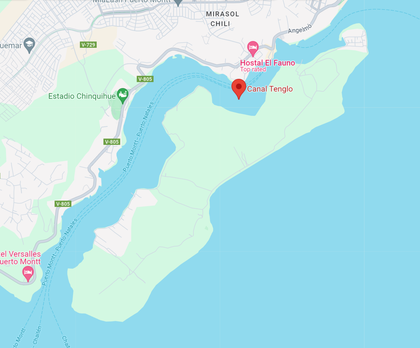  


Guto Schettini, revised 17.Jun.2025

In [1]:
import os
from dateutil.parser import parse
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
ctd_path = r'd:\GUTO\1_Trabs\1_Aestus\ChileTengloChannel\CTD\\'

ctd_dir = os.listdir(ctd_path)

ctd_sets = []

for f in ctd_dir:
    if f.endswith('.csv') == True:
        with open(ctd_path + f) as io:
            lines = io.readlines()
            
        print(len(lines))
            
        gdados = []
        trig = 0
        n = 0
        for i, li in enumerate(lines):
            if 'Measurement Date/Time,Press.' in li:
                header = li
                trig = 1
                continue
            if 'Error' in li:
                continue
            if trig == 1:
                liq = li.split(',')

                # converts time/hour to datetime
                liq[0]=parse(liq[0])

                # string to floats...
                liq[1:-1] = [float(x) for x in liq[1:-1]]

                gdados.append(liq[:-1])
       
        d = np.array(gdados) 

        # create an index for the set
        idx = np.atleast_2d(np.linspace(n, n, len(d))).T
        n += 1

        d = np.hstack((idx, d))

        ctd_sets.append(d)
     

8570
7259
6130
5199
6959
9500
7649
7669
6820
6729
7209
8119
7299
4039
6619
6879
6569
660


In [3]:
header = header.split(',')
for i, h in enumerate(header):
    
    print(i, h)

0 Measurement Date/Time
1 Press. [dbar]
2 Temp. [â„ƒ]
3 Salinity
4 Cond. [mS/cm]
5 EC [Î¼S/cm]
6 Density [kg/m3]
7 SigmaT
8 Chl-Flu. [ppb]
9 Chl-a [ppb]
10 Turb. [FTU]
11 DO [%]
12 DO [mg/l]
13 DO [Î¼mol/l]
14 Batt. [V]



In [4]:
# from the ginput
with open('i_profiles.pkl', 'rb') as io:
    i_profiles = pickle.load(io)
    

In [5]:
for i, s in enumerate(ctd_sets):
    print(i, len(s))

0 8500
1 7190
2 6060
3 5130
4 6890
5 9430
6 7580
7 7600
8 6750
9 6660
10 7140
11 8050
12 7230
13 3970
14 6550
15 6810
16 6500
17 590


### removing the incomplete section and the garbage (last item)

In [6]:
del ctd_sets[13]
del i_profiles[13]

del ctd_sets[-1]
del i_profiles[-1]

for i, s in enumerate(ctd_sets):
    print(i, len(s))

0 8500
1 7190
2 6060
3 5130
4 6890
5 9430
6 7580
7 7600
8 6750
9 6660
10 7140
11 8050
12 7230
13 6550
14 6810
15 6500


In [7]:
%matplotlib inline

In [8]:
# return the indexes of the segment of the down cast
def ctd_down_cast(z):
    # to get the down cast only
    z_ref = 0.5
    i_seg = []
    for j, zz in enumerate(z):
        if zz > z_ref:
            i_seg.append(j)
            z_ref = zz
    return i_seg


In [13]:
ctd_rdx = []
ctd_rdx_hdr = []
for i, s in enumerate(ctd_sets):
    
    # to adjust the surface level = 0
    s[:,2] = s[:,2] - np.min(s[:,2])
    
    # indexes to separate the casts (they are actually floats from ginput)
    ip = [int(x) for x in i_profiles[i]]
    
    # there is a extra point in the #2!
    if i == 2:
        ip = ip[:-1]

    ip1 = 0
    
    ctd_sets_casts = []
    ctd_sets_hdr = []
    # to get each profile (segment of a set)
    for p in range(len(ip)):
        seg = s[ip1 : ip[p], :]
        ip1 = ip[p]

        z = seg[:,2] - np.min(seg[:,2])
        
        i_seg = ctd_down_cast(z)
        down_cast = seg[i_seg, :]
        i_cast = np.atleast_2d(
                                np.linspace(p, p, len(down_cast))
                               ).T
        
        # insert the cast number after the set number (columns)
        down_cast = np.insert(down_cast, [1], i_cast, axis=1)

        
        time = down_cast[0,2]
        depth = np.max(down_cast[:,3])
        gen_hdr = [i, p, time, depth]
        
        ctd_sets_casts.append(down_cast)
        ctd_sets_hdr.append(gen_hdr)
        
    ctd_rdx.append(ctd_sets_casts)
    ctd_rdx_hdr.append(ctd_sets_hdr)
        

In [15]:
ctd = [ctd_rdx_hdr, ctd_rdx]
with open('ctd_rdx.pkl', 'wb') as io:
    pickle.dump(ctd, io)

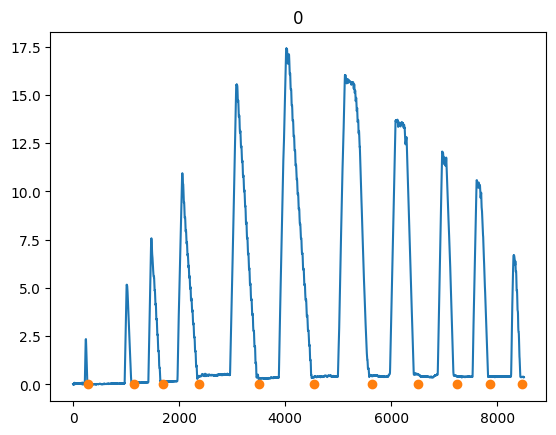

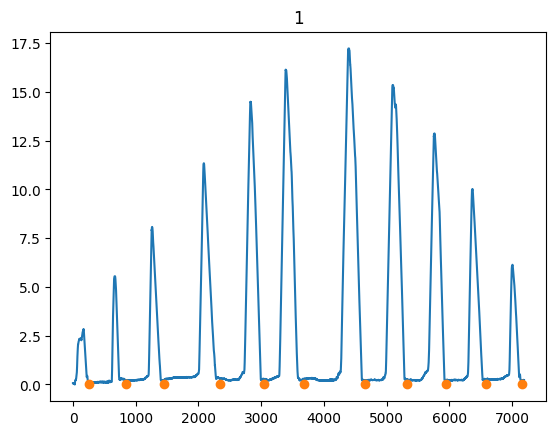

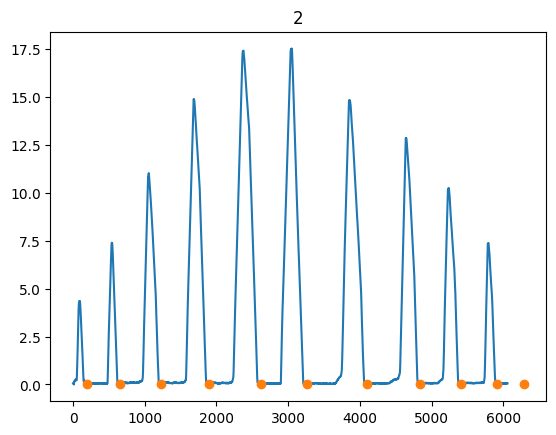

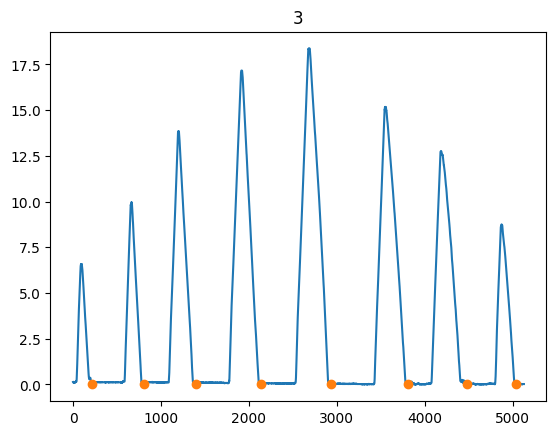

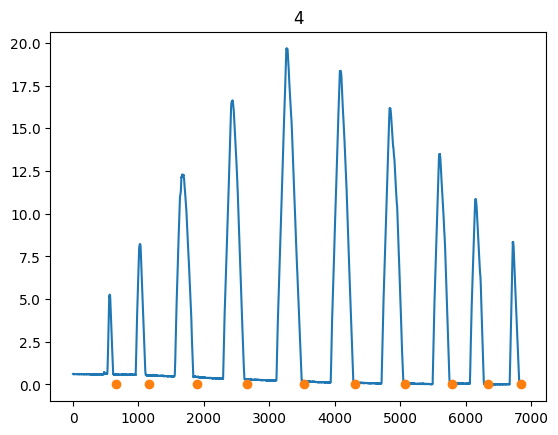

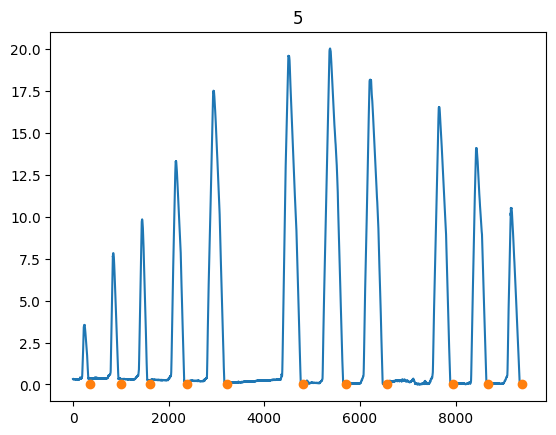

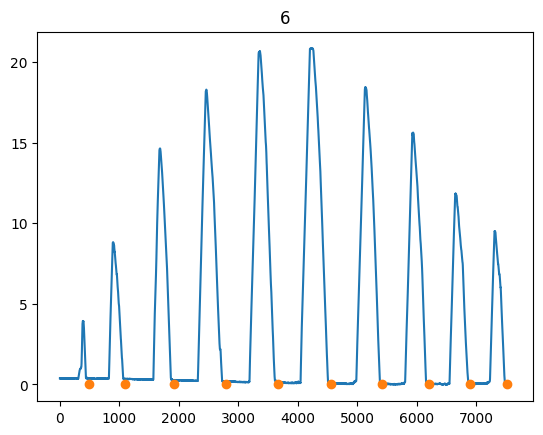

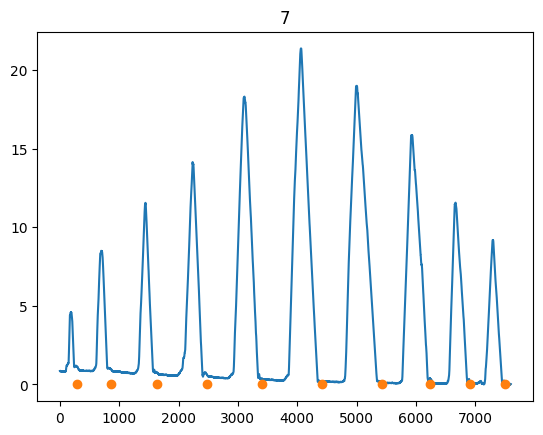

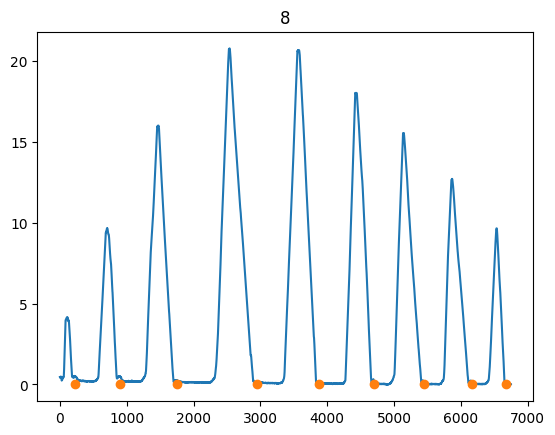

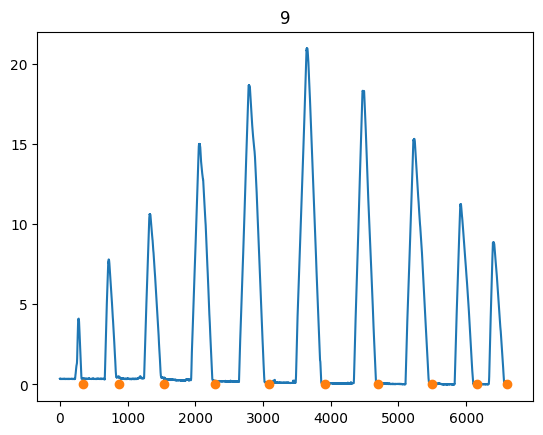

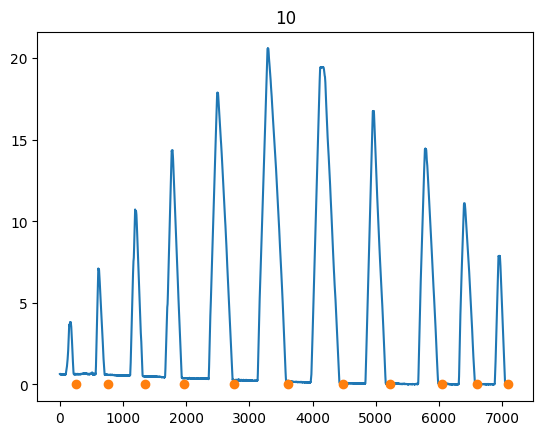

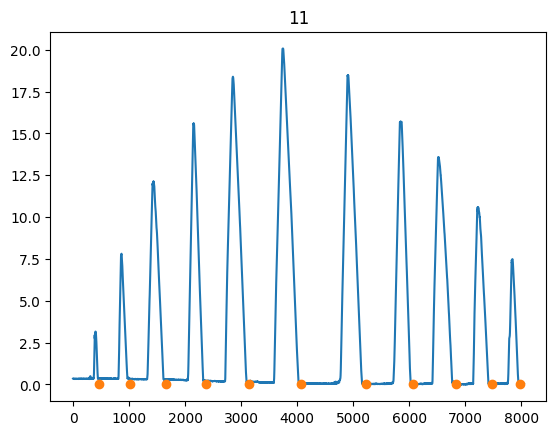

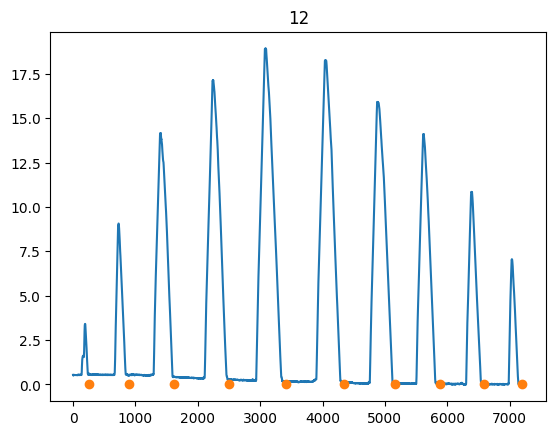

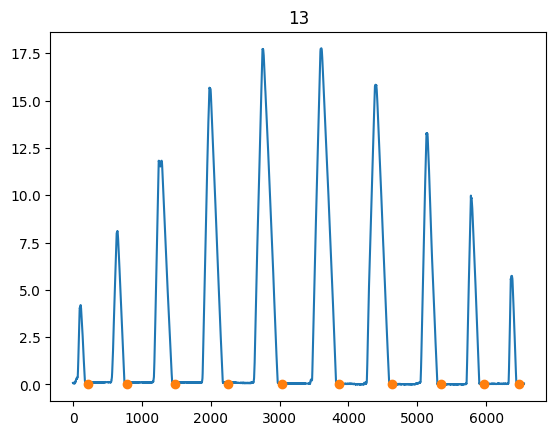

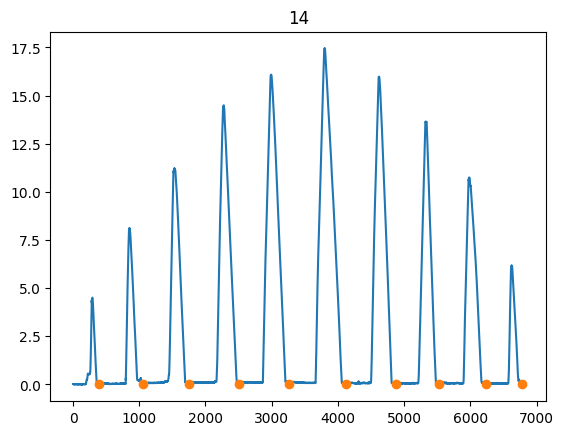

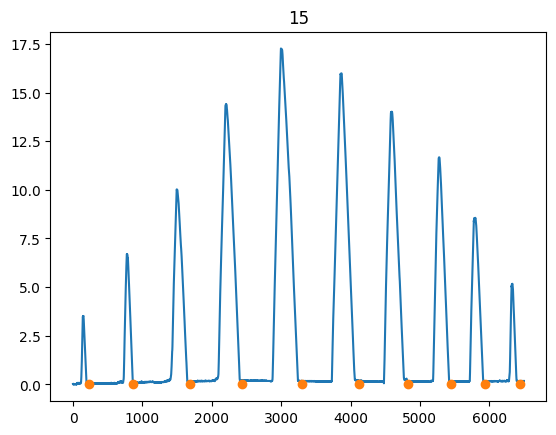

In [14]:
# checking the i_profiles on the ctd sets!
for i, s in enumerate(ctd_sets):
    plt.plot(s[:,2])
    plt.plot(i_profiles[i], np.zeros((len(i_profiles[i]))), 'o')
    plt.title(i)
    plt.show()

In [ ]:
for s in ctd_rdx:
    print(len(s))

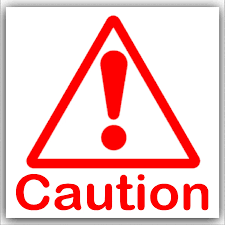
# GINPUT
# capturing the separation of the profiles
### There is on incomplete section, and the last file is garbage!

In [ ]:
import matplotlib
# matplotlib.use('TkAgg')

# n = 0
# i_profiles = []# 

In [ ]:
'''
Capturing mannualy the indexes to separate the profiles of the sections
'''

# # %matplotlib qt
# %matplotlib inline

# s = ctd_sets[n]
# plt.plot(-s[:,2])
# plt.title(str(n))

# # pts = plt.ginput(n=-1, timeout=-1)

# x = np.array(pts)
# x = x[:,0]

# i_profiles.append(x)
# print(n)
# n += 1

In [ ]:
# with open('i_profiles.pkl', 'wb') as io:
#     pickle.dump(i_profiles, io)